In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import itertools
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler


import warnings
warnings.simplefilter('ignore')

In [15]:
breast_cancer_data= pd.read_csv("data.csv")
drop_list= ['Unnamed: 32','id']
breast_cancer_data.drop(drop_list, axis=1, inplace= True)
x_drop= ['diagnosis']
x= breast_cancer_data.drop(x_drop,axis=1)
y= breast_cancer_data.diagnosis
y= y.replace("B", 0)
y= y.replace("M", 1)

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [17]:
model_dict= {}

# Logistic Regression
clf = LogisticRegression()
model_dict['Logistic Regression'] = clf

# Random Forest Classifier
clf = RandomForestClassifier()
model_dict['Random Forest Classifier'] = clf

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
model_dict['Gradient Boosting Classifier'] = clf

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
model_dict['Extra Trees Classifier'] = clf

# XGB Classifier
from xgboost import XGBClassifier
clf = XGBClassifier()
model_dict['XGB Classifier'] = clf

# K Nearest Neighbor
clf = KNeighborsClassifier()
model_dict['KNeighbors Classifier'] = clf

# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability=True)   
model_dict['SVM Classifier'] = clf

In [18]:
#Correlation features
corr_features=['radius_mean','texture_mean','perimeter_mean','area_mean','perimeter_se','area_se','radius_worst','texture_worst','perimeter_worst','area_worst']

#Chi-Square features
chi_sq_features= ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','radius_mean','perimeter_se','texture_worst','texture_mean']

# RFE features
rfe_features= ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','texture_worst','texture_mean','concavity_worst','concavity_mean','compactness_worst','concave points_worst','concave points_mean','compactness_mean','symmetry_worst','smoothness_worst']

#RFECV features
rfecv_features= ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','radius_mean','perimeter_se','texture_worst','texture_mean','concavity_worst','radius_se','concavity_mean','compactness_worst','concave points_worst','concave points_mean','compactness_mean','symmetry_worst','smoothness_worst','fractal_dimension_worst','fractal_dimension_se']

#ExtraTrees features
extra_trees_features= ['area_worst','area_mean','perimeter_worst','perimeter_mean','radius_worst','radius_mean','concavity_worst','concavity_mean','concave points_worst','concave points_mean']

#Vote based features
voted_features= ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','radius_mean','perimeter_se','texture_worst','texture_mean','concavity_worst','concavity_mean','compactness_worst','concave points_worst','concave points_mean','compactness_mean','symmetry_worst','smoothness_worst']

In [19]:
# RFECV
x_train = x_train[rfecv_features]
x_test = x_test[rfecv_features]


In [20]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [21]:
def Model_metrics(name):
    global Testing_Performance
    true_negative  = cm[0, 0]
    true_positive  = cm[1, 1]
    false_negative = cm[1, 0]
    false_positive = cm[0, 1]
    total = true_negative + true_positive + false_negative + false_positive

    accuracy_ = (true_positive + true_negative)/total
    precision_ = (true_positive)/(true_positive + false_positive)
    recall_ = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1_ = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    assert accuracy == accuracy_, "accuracy score does not agree"
    assert precision == precision_, "precision score does not agree"
    assert recall == recall_, "recall score does not agree"
    assert round(F1,6) == round(F1_,6), "F1: " + str(F1) + " != F1_: " + str(F1_)

    header = ["Metric", "Testing Performance"]
    table = [["Accuracy",               accuracy],
             ["Precision",              precision],
             ["Recall",                 recall],
             ["Misclassification rate", misclassification_rate],
             ["F1",                     F1],
             ["r2",                     r2],
             ["AUC",                    auc],
             ["MSE",                    mse],
             ["Logloss",                logloss]
            ]

    print(tabulate(table, header, tablefmt="fancy_grid"))
    Testing_Performance = Testing_Performance.append({'Algorithm' : name,'Accuracy' : accuracy,'AUC' : auc,'Precision' : precision,'Recall' : recall,'F1' : F1},ignore_index = True)

In [22]:
def Confusion_Matrix(best_model):
    cmap= plt.cm.Oranges
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classes = [0, 1]
    plt.title('Confusion matrix (on test data)')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    c_report = classification_report(y_test, y_predicted_test)
    print('\nClassification report:\n', c_report)

    ntotal = len(y_test)
    correct = y_test == y_predicted_test
    numCorrect = sum(correct)
    percent = round((numCorrect*100.0)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
    prediction_score= (best_model.score(x_test, y_test))*100.0
    assert (round(percent,3) == round(prediction_score, 3)), "prediction score does not agree"

In [23]:
def plot_roc_precision_recall_curve(label):
    class_names = [0, 1]
    fig, (left, right) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label=label)
    #x label
    plt.xlabel('False positive rate')
    #y label
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.7f)' % auc)
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_probabilities_success)

    plt.step(recall, precision, color='r', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

    plt.tight_layout()
    plt.show()

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.96978 CV Standard Deviation: 0.02339

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.97919 CV Standard Deviation: 0.01712

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.93908 CV Standard Deviation: 0.06222

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
For Metric: f1
Cross Vali

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.99138 CV Standard Deviation: 0.01231

Average Precision-Recall score:1.00
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.982456  │
├────────────────────────┼───────────────────────┤
│ Precision              │             1         │
├────────────────────────┼───────────────────────┤
│ Recall                 │             0.952381  │
├────────────────────────┼───────────────────────┤
│ Misclassification rate │             0.0175439 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.97561   │
├────────────────────────┼───────────────────────┤
│ r2                     │    

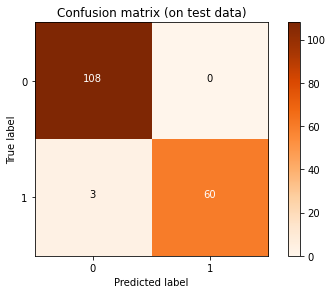

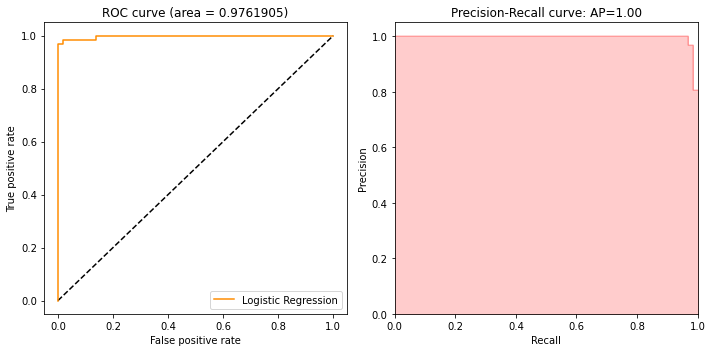

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.95478 CV Standard Deviation: 0.03021



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.95255 CV Standard Deviation: 0.03616



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.91908 CV Standard Deviation: 0.06264



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: f1
Cross Validation scores on training data:
CV Mean: 0.93851 CV Standard Deviation: 0.04328



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: average_precision
Cross Validation scores on training data:
CV Mean: 0.98347 CV Standard Deviation: 0.01732



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.98970 CV Standard Deviation: 0.01134

Average Precision-Recall score:0.99
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.976608  │
├────────────────────────┼───────────────────────┤
│ Precision              │             0.983607  │
├────────────────────────┼───────────────────────┤
│ Recall                 │             0.952381  │
├────────────────────────┼───────────────────────┤
│ Misclassification rate │             0.0233918 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.967742  │
├────────────────────────┼───────────────────────┤
│ r2                     

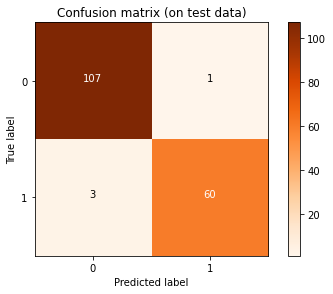

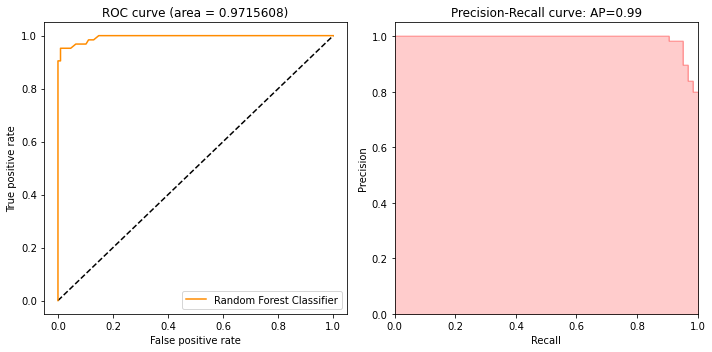

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.94475 CV Standard Deviation: 0.03755



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.93999 CV Standard Deviation: 0.05735



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.91931 CV Standard Deviation: 0.06885



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: f1
Cross Validation scores on training data:
CV Mean: 0.92852 CV Standard Deviation: 0.05909



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: average_precision
Cross Validation scores on training data:
CV Mean: 0.97937 CV Standard Deviation: 0.01765



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.97900 CV Standard Deviation: 0.02522

Average Precision-Recall score:0.99
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.97076   │
├────────────────────────┼───────────────────────┤
│ Precision              │             0.983333  │
├────────────────────────┼───────────────────────┤
│ Recall                 │             0.936508  │
├────────────────────────┼───────────────────────┤
│ Misclassification rate │             0.0292398 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.95935   │
├────────────────────────┼───────────────────────┤
│ r2                 

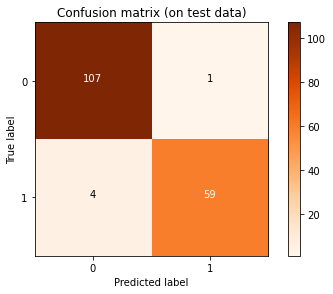

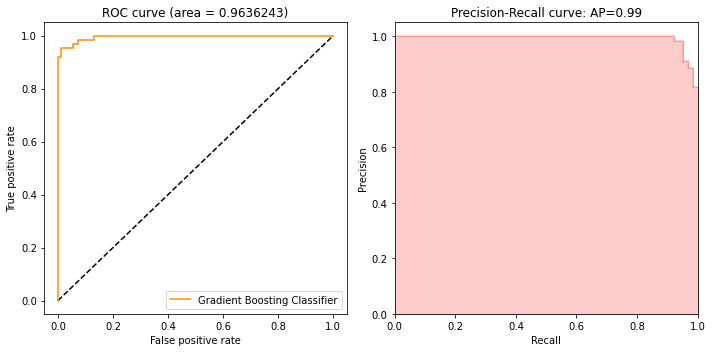

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.95975 CV Standard Deviation: 0.02563



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.97260 CV Standard Deviation: 0.02645



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.93241 CV Standard Deviation: 0.03820



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: f1
Cross Validation scores on training data:
CV Mean: 0.94007 CV Standard Deviation: 0.04242



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: average_precision
Cross Validation scores on training data:
CV Mean: 0.98713 CV Standard Deviation: 0.01428



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.99038 CV Standard Deviation: 0.01074

Average Precision-Recall score:1.00
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.976608  │
├────────────────────────┼───────────────────────┤
│ Precision              │             0.983607  │
├────────────────────────┼───────────────────────┤
│ Recall                 │             0.952381  │
├────────────────────────┼───────────────────────┤
│ Misclassification rate │             0.0233918 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.967742  │
├────────────────────────┼───────────────────────┤
│ r2                     │ 

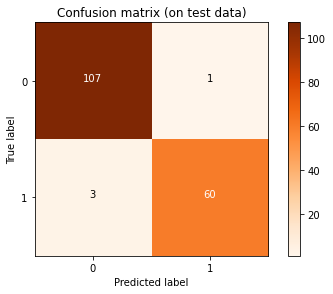

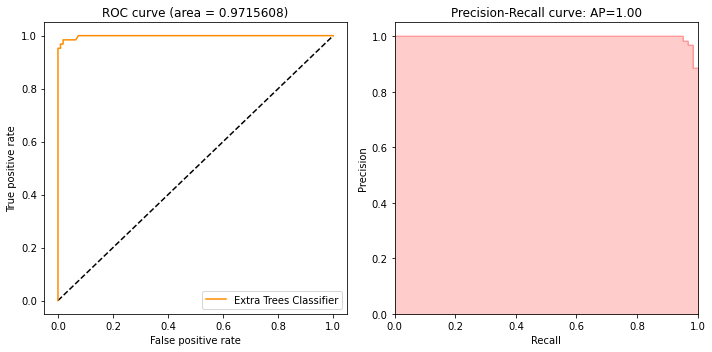

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.95728 CV Standard Deviation: 0.02814



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.94786 CV Standard Deviation: 0.03453



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.93885 CV Standard Deviation: 0.07591



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: f1
Cross Validation scores on training data:
CV Mean: 0.94122 CV Standard Deviation: 0.04013



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: average_precision
Cross Validation scores on training data:
CV Mean: 0.98494 CV Standard Deviation: 0.01735



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.98595 CV Standard Deviation: 0.01813

[22:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Precision-Recall score:1.00
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.982456  │
├────────────────────────┼───────────────────────┤
│ Precision              │             1         │
├────────────────────────┼───────────────────────┤
│ Recall                 │     

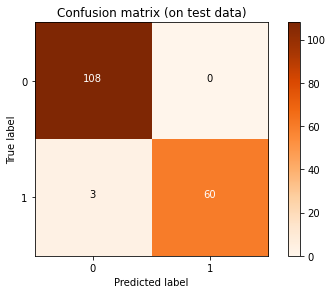

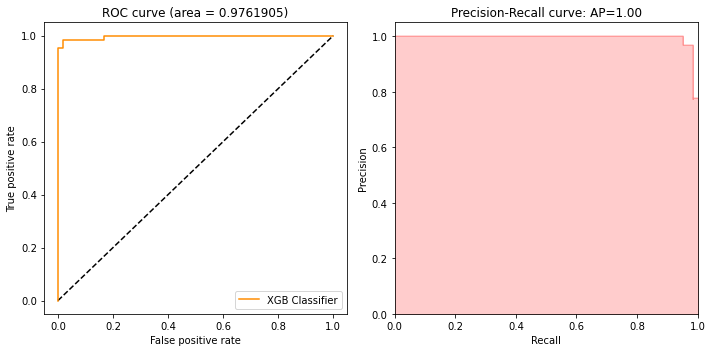


---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.97231 CV Standard Deviation: 0.01476

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.97999 CV Standard Deviation: 0.01636

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.94575 CV Standard Deviation: 0.04685

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
For Metric: f1
C

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accuracy               │             0.964912  │
├────────────────────────┼───────────────────────┤
│ Precision              │             0.967213  │
├────────────────────────┼───────────────────────┤
│ Recall                 │             0.936508  │
├────────────────────────┼───────────────────────┤
│ Misclassification rate │             0.0350877 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.951613  │
├────────────────────────┼───────────────────────┤
│ r2                     │             0.849206  │
├────────────────────────┼───────────────────────┤
│ AUC                    │             0.958995  │
├────────────────────────┼───────────────────────┤
│ MSE                    │             0.0350877 │
├────────────────────────┼───────────────────────┤
│ Logloss                │     

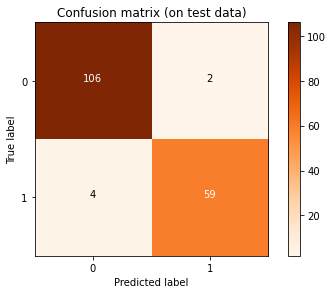

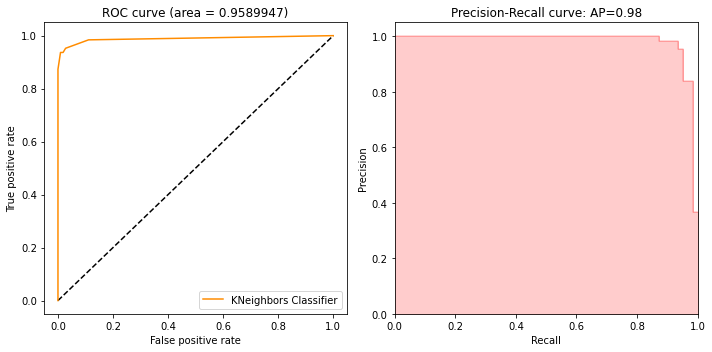


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: accuracy
Cross Validation scores on training data:
CV Mean: 0.96981 CV Standard Deviation: 0.02201

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: precision
Cross Validation scores on training data:
CV Mean: 0.96767 CV Standard Deviation: 0.03335

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: recall
Cross Validation scores on training data:
CV Mean: 0.95241 CV Standard Deviation: 0.05950



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: f1
Cross Validation scores on training data:
CV Mean: 0.95849 CV Standard Deviation: 0.03148

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: average_precision
Cross Validation scores on training data:
CV Mean: 0.99312 CV Standard Deviation: 0.00772

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
For Metric: roc_auc
Cross Validation scores on training data:
CV Mean: 0.99470 CV Standard Deviation: 0.00617

Average Precision-Recall score:0.99
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ Accura

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished



Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171


Correct classifications on test data: 169/171   98.830%


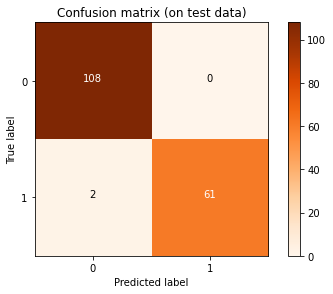

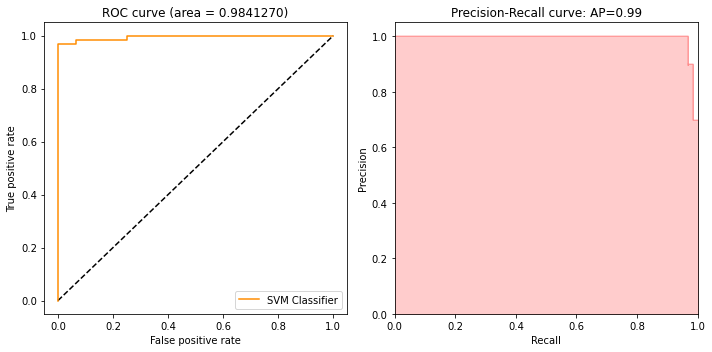

In [24]:
kfolds= 5
param_comb = 5
skf = StratifiedKFold(n_splits= kfolds, shuffle= True, random_state = 43)
metrics=['accuracy','precision','recall', 'f1','average_precision', 'roc_auc']
Training_Performance= pd.DataFrame(columns= ['Algorithm','Metric','Mean Cross-Validation', 'CV std']) 
Testing_Performance= pd.DataFrame(columns= ['Algorithm','Accuracy','AUC','Precision','Recall','F1'])
for name, model in model_dict.items():
    for m in metrics:
        score= cross_val_score(model, x_train, y_train, scoring=m, cv=skf, verbose=1, n_jobs=2)
        print("---------------------------------------------------------------------") 
        print(name)
        print("---------------------------------------------------------------------")
        print("For Metric: %s" % (m))
        print("Cross Validation scores on training data:")
        print ('CV Mean: %.5f CV Standard Deviation: %.5f'% (np.mean(np.abs(score)), np.std(score)))
        print("") 
         
        Training_Performance= Training_Performance.append({'Algorithm' : name, 'Metric' : m, 'Mean Cross-Validation' : np.mean(np.abs(score)),'CV std' : np.std(score)},  
                ignore_index = True) 
        
    model.fit(x_train, y_train)
    y_predicted_test= model.predict(x_test)
    y_probabilities_test= model.predict_proba(x_test)
    y_probabilities_success= y_probabilities_test[:, 1]

    from sklearn.metrics import average_precision_score
    average_precision= average_precision_score(y_test, y_probabilities_success)
    print('Average Precision-Recall score:{0:0.2f}'.format(average_precision))

    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test, y_probabilities_success)

    mse        = mean_squared_error(y_test, y_predicted_test)
    logloss    = log_loss(y_test, y_predicted_test)
    accuracy   = accuracy_score(y_test, y_predicted_test)
    precision  = precision_score(y_test, y_predicted_test, average='binary')
    recall     = recall_score(y_test, y_predicted_test, average='binary')
    F1         = f1_score(y_test, y_predicted_test)
    r2         = r2_score(y_test, y_predicted_test)
    auc        = roc_auc_score(y_test, y_predicted_test)
    cm         = confusion_matrix(y_test, y_predicted_test)
    
    Model_metrics(name)
    Confusion_Matrix(model)
    plot_roc_precision_recall_curve(name)
    
    print("")

In [25]:
Training_PerformancePivot= pd.pivot_table(Training_Performance,index=["Algorithm"],values=["Mean Cross-Validation"],columns=["Metric"], aggfunc=[np.min])
Training_PerformancePivot

amin                    \
                             Mean Cross-Validation                     
Metric                                    accuracy average_precision   
Algorithm                                                              
Extra Trees Classifier                    0.959747          0.987134   
Gradient Boosting Classifier              0.944747          0.979366   
KNeighbors Classifier                     0.972310          0.976519   
Logistic Regression                       0.969778          0.990363   
Random Forest Classifier                  0.954778          0.983471   
SVM Classifier                            0.969810          0.993116   
XGB Classifier                            0.957278          0.984945   

                                                                      
                                                                      
Metric                              f1 precision    recall   roc_auc  
Algorithm                                                             
Extra Trees Classifier        0.940066  0.972596  0.932414  0.990378  
Gradient Boosting Classifier  0.928519  0.939985  0.919310  0.979001  
KNeighbors Classifier         0.961681  0.979985  0.945747  0.982051  
Logistic Regression           0.957587  0.979189  0.939080  0.991376  
Random Forest Classifier      0.938513  0.952550  0.919080  0.989704  
SVM Classifier                0.958489  0.967674  0.952414  0.994696  
XGB Classifier                0.941221  0.947859  0.938851  0.985946

In [26]:
Testing_Performance.sort_values(by=['Algorithm'])

,Algorithm,Accuracy,AUC,Precision,Recall,F1
3,Extra Trees Classifier,0.976608,0.971561,0.983607,0.952381,0.967742
2,Gradient Boosting Classifier,0.970760,0.963624,0.983333,0.936508,0.959350
5,KNeighbors Classifier,0.964912,0.958995,0.967213,0.936508,0.951613
0,Logistic Regression,0.982456,0.976190,1.000000,0.952381,0.975610
1,Random Forest Classifier,0.976608,0.971561,0.983607,0.952381,0.967742
6,SVM Classifier,0.988304,0.984127,1.000000,0.968254,0.983871
4,XGB Classifier,0.982456,0.976190,1.000000,0.952381,0.975610
